# Introduction to Machine Learning with scikit-learn

## Installation/setup

In [1]:
# Install these modules via pip or in Conda environment
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Check versions and dependencies
# Show dependencies/versions
from platform import python_version
print(f'python version {python_version()}')
print(f'numpy version {np.__version__}')
print(f'sklearn version {sklearn.__version__}')
print(f'pandas version {pd.__version__}')
print(f'matplotlib version {matplotlib.__version__}')
print(f'seaborn version {sns.__version__}')


python version 3.8.2
numpy version 1.19.2
sklearn version 0.23.2
pandas version 1.2.1
matplotlib version 3.3.2
seaborn version 0.11.2


## Main flavours of Machine Learning

1. **Supervised**: use labeled data to train model, make predictions on new data (needs to generalise to out-of-sample data)
  - **categorical output**: Classification<br>
  - **continuous output**: Regression<br>


2. **Unsupervised**: extract structure from unlabeled data
  - **categorical output**: Clustering<br>
  - **continuous output**: Dimensionality reduction<br>


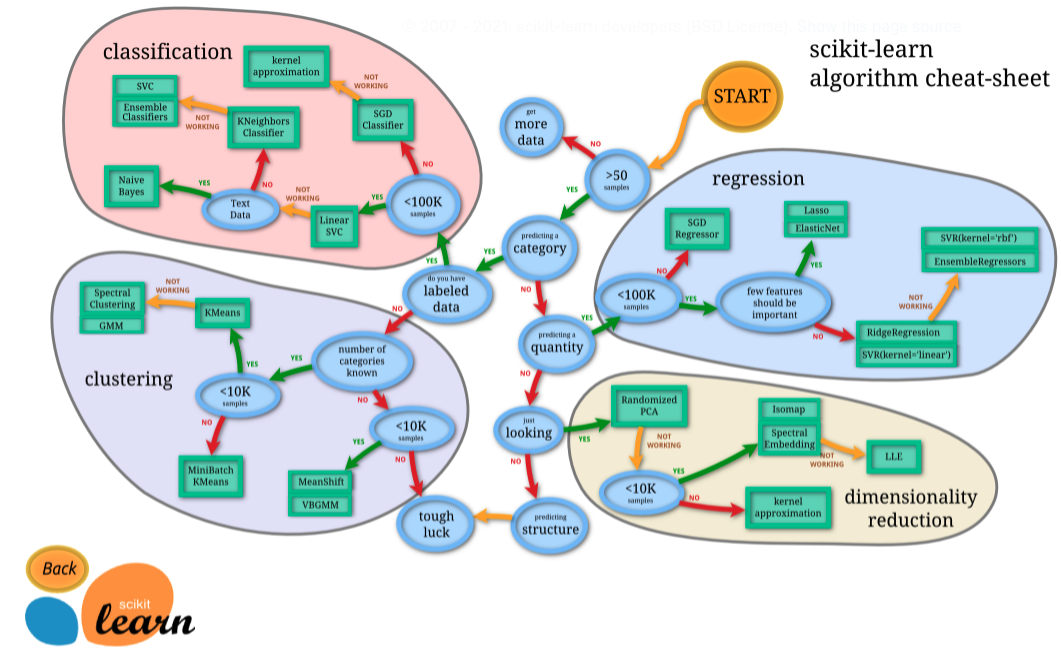

Clickable figure: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html <br>
Extensive documentation: https://scikit-learn.org/

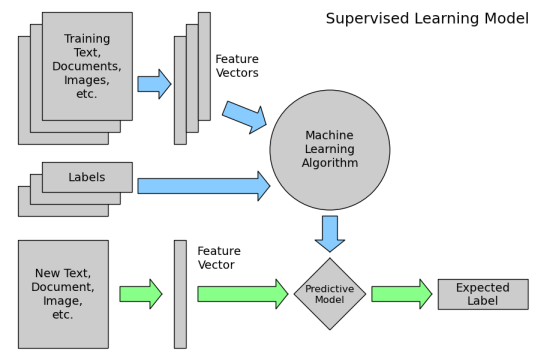

# Example 1: supervised learning - classification

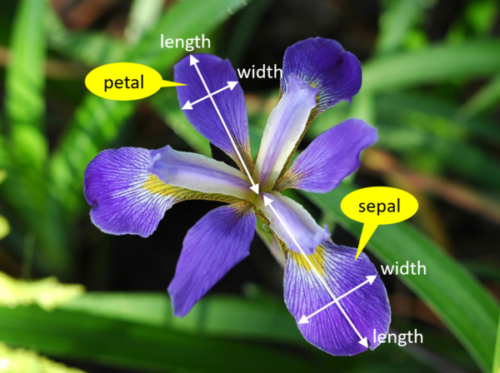

In [80]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
iris = load_iris()


In [81]:
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [82]:
# store feature matrix in "X"
X = iris.data
print(X.shape)

# store response vector in "y"
y = iris.target
print(y.shape)

(150, 4)
(150,)


### Requirements for working with data in scikit-learn
1. Features and labels are separate objects
2. Features and labels should be numeric
3. Features and labels should be NumPy arrays of compatible sizes (incl Pandas DataFrame and Series)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # Other parameters are reasonable defaults


In [108]:
# Completely different use case and model, still same interface:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=24)

In [85]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]] # Out of sample
knn.predict(X_new)

array([1, 1])

## Try different model
Apply same 4 steps:

In [86]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model to data
logreg.fit(X, y)

# predict the labels for out-of-sample data
logreg.predict(X_new)

array([2, 0])

## Model evaluation procedures

In [88]:
# Estimate training accuracy 
from sklearn import metrics
# (measured on same data set as model was fitted to)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))



0.96


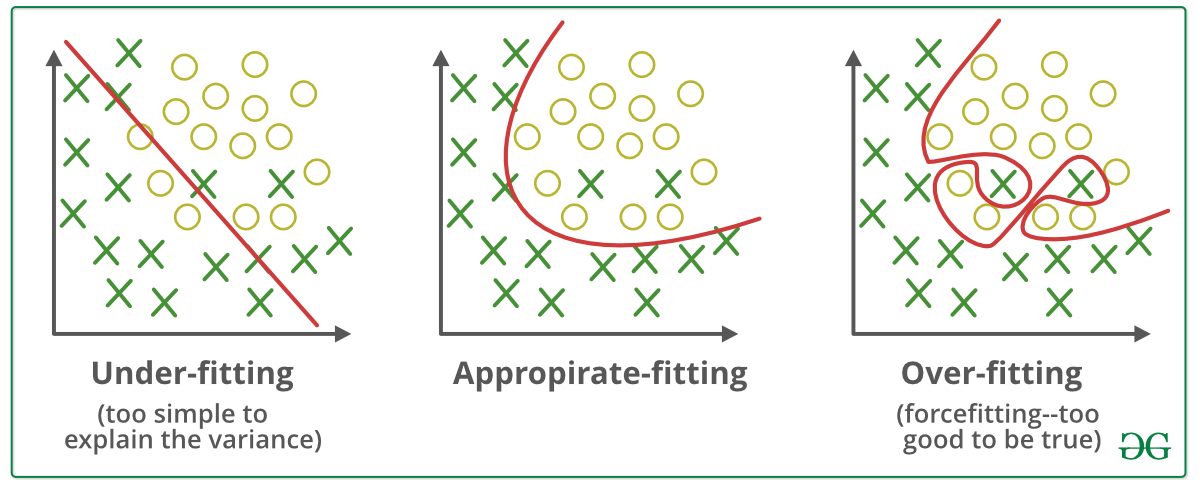

- Maximizing training accuracy rewards complex models that don't generalise
- No way to figure out if model has overfit to the training data
- Remedy: Split data between train and test set
  - Use test set **only** for model evaluation

In [89]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [90]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [91]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


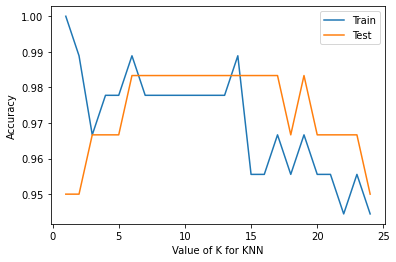

In [92]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 25))
scores_train = []
scores_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    scores_train.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    scores_test.append(metrics.accuracy_score(y_test, y_pred))
    
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores_train, label='Train')
plt.plot(k_range, scores_test, label='Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()

- As complexity rises (towards lower value of K), training accuracy improves
- Testing accuracy penalizes models that are too complex or not complex enough
- Data set is very small to make definitive statements on how well the model generalizes, but you get the idea ;-)

# Example 2: Supervised Learning - Regression

In [65]:
# https://www.kaggle.com/bumba5341/advertisingcsv
# https://mdporter.github.io/ST597/lectures/16-regression.pdf
data = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)

data.sample(10)


,TV,radio,newspaper,sales
71,199.1,30.6,38.7,18.3
164,163.5,36.8,7.4,18.0
111,225.8,8.2,56.5,13.4
186,205.0,45.1,19.6,22.6
81,76.4,26.7,22.3,11.8
172,164.5,20.9,47.4,14.5
131,0.7,39.6,8.7,1.6
200,232.1,8.6,8.7,13.4
70,216.8,43.9,27.2,22.3
194,166.8,42.0,3.6,19.6


Features: advertisement costs spent on TV, Radio and Newspaper<br>
Labels: sales of a product in a given market
### Goal: predict sales of a product based on advertisement costs


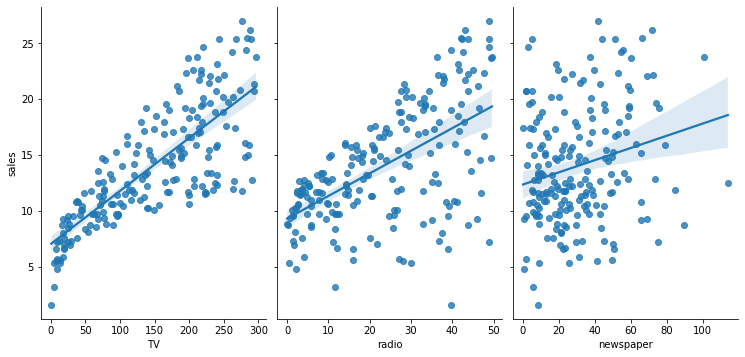

In [240]:
# visualize the relationship between the features and the labels using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', height=5, aspect=0.7, kind='reg')

In [67]:
# Fill X and y arrays
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]

y = data['sales']

# Split the data set between training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


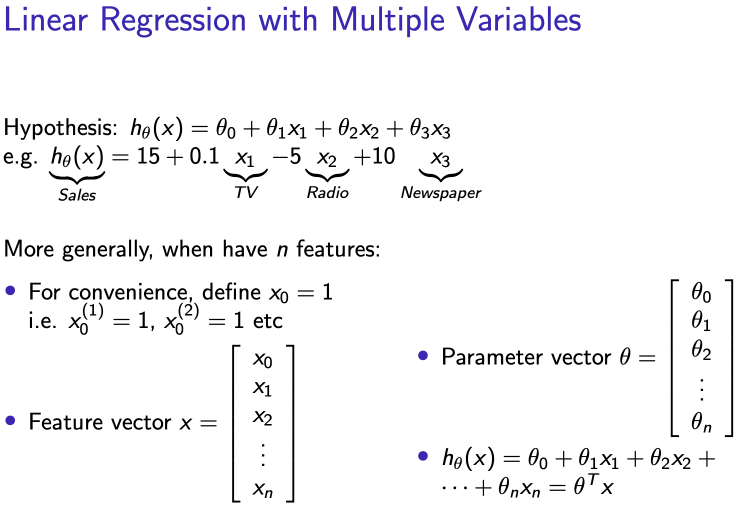

In [68]:
# import Linear regression model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression()

In [69]:
# print the intercept
print(linreg.intercept_)
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

2.87696662231793


[('TV', 0.04656456787415028),
 ('radio', 0.17915812245088844),
 ('newspaper', 0.0034504647111804473)]

In [70]:
# make predictions on the test set
y_pred = linreg.predict(X_test)

In [71]:
# Model evaluation metrics for regression
print(f'MAE = {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')


MAE = 1.0668917082595208
MSE = 1.9730456202283373
RMSE = 1.404651423032895


Text(0, 0.5, 'Label')

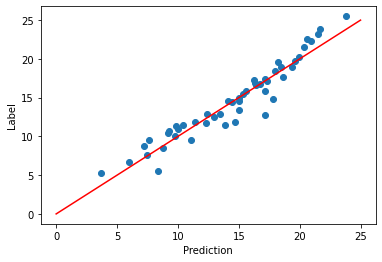

In [72]:
plt.scatter(y_pred,y_test)
plt.plot([0,25],[0,25], color='r')
plt.xlabel('Prediction')
plt.ylabel('Label')

## Predict on new data

In [76]:
X_new = pd.DataFrame({'TV': [200], 'radio': [10],'Newspaper': [40]})
linreg.predict(X_new)

array([14.11948001])

## Linear regression
**Pros:** fast and highly interpretable <br>
**Cons:** limited linear model, often not highly accurate<br>

Can make it more complicated by including polynomial features. <br>
In case one of the features is categorical, have to use dummy encoding. 

## Example 1 - Classification - reloaded

In [ ]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
iris = load_iris()
# store feature matrix in "X"
X = iris.data
print(X.shape)

# store response vector in "y"
y = iris.target
print(y.shape)

## Cross-validation

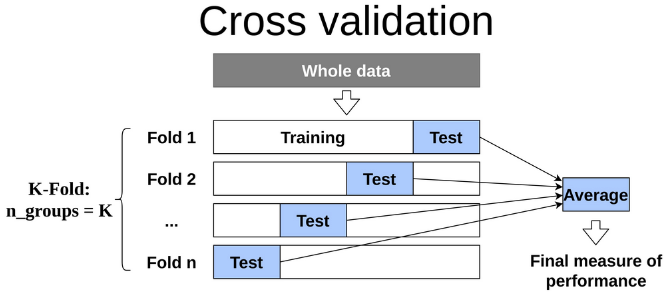

## Efficient parameter tuning using GridSearchCV
Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 25))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)
# instantiate the grid, K=10 folds
grid = GridSearchCV(estimator=knn, param_grid, cv=10, scoring='accuracy')
# fit the grid with data
grid.fit(X, y)



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]}


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [140]:
#Check results 
df_result = pd.DataFrame(grid.cv_results_) #[['mean_test_score','params']]
df_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000655,0.000267,0.001482,0.000562,1,{'n_neighbors': 1},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,1.000000,1.0,1.0,0.960000,0.053333,22
1,0.000352,0.000056,0.000931,0.000202,2,{'n_neighbors': 2},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.866667,0.933333,1.0,1.0,0.953333,0.052068,24
2,0.000424,0.000130,0.000960,0.000192,3,{'n_neighbors': 3},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,18
3,0.000373,0.000076,0.000919,0.000228,4,{'n_neighbors': 4},1.0,0.933333,1.0,0.933333,0.866667,1.000000,0.933333,1.000000,1.0,1.0,0.966667,0.044721,18
4,0.000357,0.000104,0.000851,0.000171,5,{'n_neighbors': 5},1.0,0.933333,1.0,1.000000,0.866667,0.933333,0.933333,1.000000,1.0,1.0,0.966667,0.044721,12


Text(0, 0.5, 'Cross-Validated Accuracy')

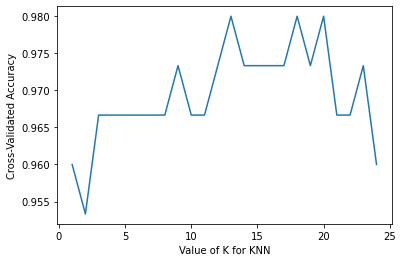

In [139]:
plt.plot(df_result['param_n_neighbors'],df_result['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [134]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


In [149]:
# Can use predict method immediately on grid object.
grid.predict([[3, 5, 4, 2]])

array([1])

In [175]:
# Often quicker to use randomized search than grid search, especially in higher dimension
from sklearn.model_selection import RandomizedSearchCV
k_range = list(range(1, 25))
weight_options = ['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=weight_options)
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=20, random_state=5)
rand.fit(X, y)
results = pd.DataFrame(rand.cv_results_) 
results[['mean_test_score', 'params']].head()

,mean_test_score,params
0,0.980000,"{'weights': 'distance', 'n_neighbors': 15}"
1,0.973333,"{'weights': 'uniform', 'n_neighbors': 17}"
2,0.966667,"{'weights': 'uniform', 'n_neighbors': 4}"
3,0.973333,"{'weights': 'distance', 'n_neighbors': 9}"
4,0.973333,"{'weights': 'distance', 'n_neighbors': 10}"


In [176]:
print(rand.best_score_)
print(rand.best_params_)

0.9800000000000001
{'weights': 'distance', 'n_neighbors': 15}


In [183]:
print(rand.predict([[4,5,6,7]]))
print(iris.target_names[rand.predict([[4,5,6,7]])[0]])

[2]
virginica


## Preprocessing may be necessary

In [192]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [190]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [205]:
X_test = X.copy()
X_test[:,0] = X_test[:,0]*10000.

In [207]:
X_test

array([[5.1e+04, 3.5e+00, 1.4e+00, 2.0e-01],
       [4.9e+04, 3.0e+00, 1.4e+00, 2.0e-01],
       [4.7e+04, 3.2e+00, 1.3e+00, 2.0e-01],
       [4.6e+04, 3.1e+00, 1.5e+00, 2.0e-01],
       [5.0e+04, 3.6e+00, 1.4e+00, 2.0e-01],
       [5.4e+04, 3.9e+00, 1.7e+00, 4.0e-01],
       [4.6e+04, 3.4e+00, 1.4e+00, 3.0e-01],
       [5.0e+04, 3.4e+00, 1.5e+00, 2.0e-01],
       [4.4e+04, 2.9e+00, 1.4e+00, 2.0e-01],
       [4.9e+04, 3.1e+00, 1.5e+00, 1.0e-01],
       [5.4e+04, 3.7e+00, 1.5e+00, 2.0e-01],
       [4.8e+04, 3.4e+00, 1.6e+00, 2.0e-01],
       [4.8e+04, 3.0e+00, 1.4e+00, 1.0e-01],
       [4.3e+04, 3.0e+00, 1.1e+00, 1.0e-01],
       [5.8e+04, 4.0e+00, 1.2e+00, 2.0e-01],
       [5.7e+04, 4.4e+00, 1.5e+00, 4.0e-01],
       [5.4e+04, 3.9e+00, 1.3e+00, 4.0e-01],
       [5.1e+04, 3.5e+00, 1.4e+00, 3.0e-01],
       [5.7e+04, 3.8e+00, 1.7e+00, 3.0e-01],
       [5.1e+04, 3.8e+00, 1.5e+00, 3.0e-01],
       [5.4e+04, 3.4e+00, 1.7e+00, 2.0e-01],
       [5.1e+04, 3.7e+00, 1.5e+00, 4.0e-01],
       [4.

In [206]:
rand.fit(X_test, y)
results = pd.DataFrame(rand.cv_results_) 
results[['mean_test_score', 'params']].head()

,mean_test_score,params
0,0.793333,"{'weights': 'distance', 'n_neighbors': 15}"
1,0.753333,"{'weights': 'uniform', 'n_neighbors': 17}"
2,0.800000,"{'weights': 'uniform', 'n_neighbors': 4}"
3,0.793333,"{'weights': 'distance', 'n_neighbors': 9}"
4,0.793333,"{'weights': 'distance', 'n_neighbors': 10}"


## Include pre-processing step in pipeline

In [237]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# Define sklearn pipeline
pipe = Pipeline([
    ("scale", StandardScaler()),  # Mean=0 and Sigma=1
    ("model", KNeighborsClassifier())
])
# Define gridsearch object with parameter ranges
k_range = list(range(1, 25))
weight_options = ['uniform', 'distance']
param_dist = dict(model__n_neighbors=k_range, model__weights=weight_options)
mod = GridSearchCV(estimator=pipe,
                 param_grid=param_dist,
                 cv=10)
# Fit model
mod.fit(X, y);

In [238]:
mod.best_params_

{'model__n_neighbors': 8, 'model__weights': 'uniform'}

In [239]:
print(mod.best_score_)
print(mod.best_params_)

0.9666666666666668
{'model__n_neighbors': 8, 'model__weights': 'uniform'}


## Summary

In [177]:
rand.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'iid': 'deprecated',
 'n_iter': 20,
 'n_jobs': None,
 'param_distributions': {'n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24],
  'weights': ['uniform', 'distance']},
 'pre_dispatch': '2*n_jobs',
 'random_state': 5,
 'refit': True,
 'return_train_score': False,
 'scoring': 'accuracy',
 'verbose': 0}

In [111]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


In [ ]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 25))
scores_train = []
scores_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    scores_train.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    scores_test.append(metrics.accuracy_score(y_test, y_pred))
    
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores_train, label='Train')
plt.plot(k_range, scores_test, label='Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()

### Risk of using Accuracy as metric


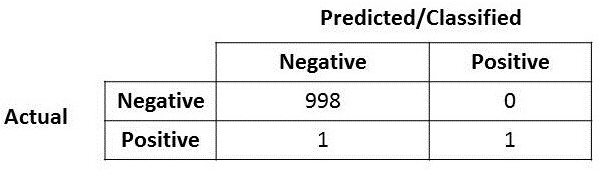

Accuracy = 99.9%<br>
Recall = TP/(TP+FN) = 1/(1+1) = 50%<br>
Precision = TP/(TP+FP) = 1/(1+0) = 100%<br>
Precision and Recall better when dealing with imbalanced data set.

In [94]:
X_train_backup = X_train.copy()

In [105]:
X_train = X_train_backup.copy()
X_train[:,2]=X_train[:,2]*1.

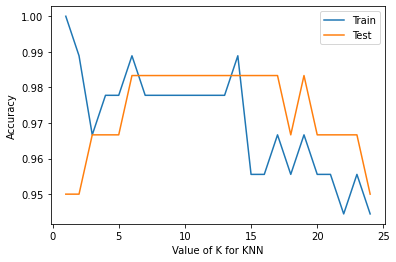

In [106]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 25))
scores_train = []
scores_test = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    scores_train.append(metrics.accuracy_score(y_train, y_pred))
    y_pred = knn.predict(X_test)
    scores_test.append(metrics.accuracy_score(y_test, y_pred))
    
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores_train, label='Train')
plt.plot(k_range, scores_test, label='Test')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.legend()

## (Re)Sources:
https://github.com/justmarkham/scikit-learn-videos <br>
https://calmcode.io/ <br>
https://github.com/koaning/calm-notebooks <br>
https://www.scss.tcd.ie/doug.leith/ST3009/linear_regression_1.pdf <br>
https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 <br>
